# FreeCodeChallenge 04: Page View Time Series Visualizer.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv")
df.head(5)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [3]:
# Initial data dimension
df.shape

(1304, 2)

In [4]:
# Checking information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


### Transforming date values (Dtype object) to dateTime

In [5]:
df["date"] = pd.to_datetime(df["date"])
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


### Setting date as index

In [6]:
df.set_index("date", inplace=True)
df.head(5)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


### Cleaning data

In [7]:
# Dropping rows with non values
df = df.replace(to_replace="None", value=np.nan).dropna()

# Filtering data by removing days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df.sample(5)

,value
date,
2016-06-15,18584
2019-08-01,103424
2017-06-06,47989
2017-03-12,26416
2019-09-03,102896


In [8]:
# Checking new dimension dataset
df.shape

(1238, 1)

### Drawing line plot

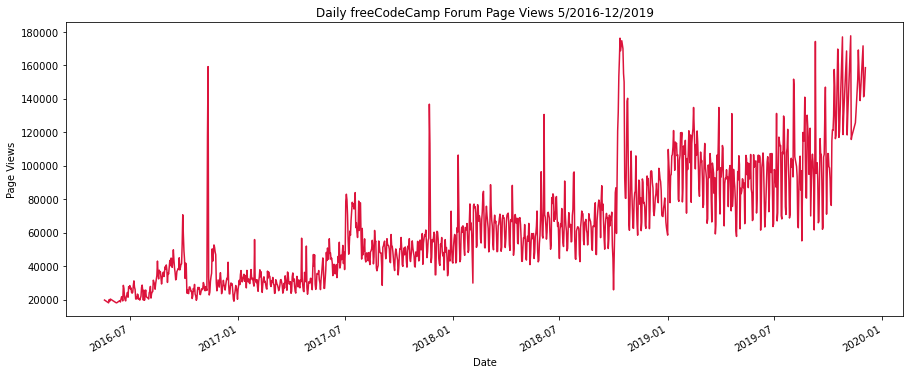

In [9]:
linePlot = df.plot.line(
    figsize=(15, 6),
    title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019",
    xlabel="Date",
    ylabel="Page Views",
    color="crimson",
    legend=False)

plt.show()

In [10]:
# Saving the line plot
fig = linePlot.get_figure()
fig.savefig("line_plot.png")

### Drawing bar plot
This plot shows average daily page views for each month grouped by year.

In [11]:
# Copying initial dataframe and formatting columns by years and months
df_bar = df.copy()
df_bar["year"] = df_bar.index.year
df_bar["month"] = df_bar.index.month
df_bar.sample(5)

,value,year,month
date,,,
2018-01-26,56792,2018,1
2017-04-12,31360,2017,4
2019-09-19,106773,2019,9
2017-12-24,36708,2017,12
2019-01-20,78679,2019,1


In [12]:
# Assigning name to the month integers
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_bar["month"] = df_bar["month"].apply(lambda x: months[x-1])

# Setting month column as categorical data to enable proper sorting
df_bar["month"] = pd.Categorical(df_bar["month"], categories=months, ordered=True)
df_bar.sample(5)

,value,year,month
date,,,
2017-04-26,30675,2017,April
2018-06-16,50098,2018,June
2017-01-01,26185,2017,January
2016-11-11,159186,2016,November
2017-04-06,32455,2017,April


In [13]:
# Groupping data by year and month
df_bar = pd.DataFrame(df_bar.groupby(["year", "month"]).mean().round(2))
df_bar.rename(columns={"value": "Average Page Views"}, inplace=True)
df_bar.sample(5)

,,Average Page Views
year,month,
2017,April,30878.73
2016,February,NaN
2017,June,43577.50
2016,November,40448.63
2017,September,47376.80


In [14]:
# Creating pivot table
df_bar = df_bar.reset_index()
df_bar = df_bar.pivot(index="year", columns="month", values="Average Page Views")
df_bar

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.40,21875.11,24109.68,31049.19,41476.87,27398.32,40448.63,27832.42
2017,32785.16,31113.07,29369.10,30878.73,34244.29,43577.50,65806.84,47712.45,47376.80,47438.71,57701.57,48420.58
2018,58580.10,65679.00,62693.77,62350.83,56562.87,70117.00,63591.06,62831.61,65941.73,111378.14,78688.33,80047.48
2019,102056.52,105968.36,91214.48,89368.43,91439.90,90435.64,97236.57,102717.31,97268.83,122802.27,143166.43,150733.50


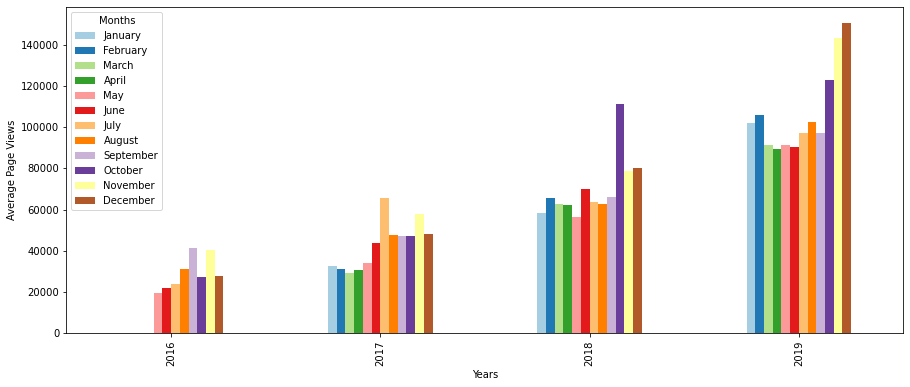

In [15]:
# Drawing the bar plot
barPlot = df_bar.plot.bar(
    figsize=(15, 6),
    xlabel="Years",
    ylabel="Average Page Views",
    legend=True,
    cmap="Paired")

plt.legend(title="Months")
plt.show()

In [16]:
# Saving the bar plot
fig = barPlot.get_figure()
fig.savefig("bar_plot.png")

### Drawing box plots
These box plots show how the values are distributed within a given year or month and how it compares over time.

In [17]:
# Preparing data for the box plots
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime('%b') for d in df_box.date]

# Setting month column as categorical data to enable proper sorting
m = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_box["month"] = pd.Categorical(df_box["month"], categories=m, ordered=True)
df_box.sample(5)

,date,value,year,month
1105,2019-06-25,107039,2019,Jun
807,2018-08-26,49398,2018,Aug
701,2018-05-12,40878,2018,May
453,2017-09-06,53952,2017,Sep
645,2018-03-17,48609,2018,Mar


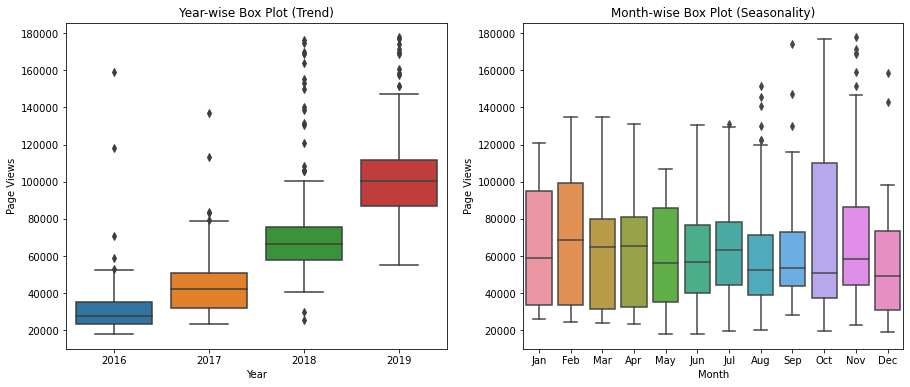

In [18]:
# Drawing box plots using Seaborn

fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(data=df_box, x="year", y="value", orient="v", ax=ax[0])
sns.boxplot(data=df_box, x="month", y="value", orient="v", ax=ax[1])
ax[0].set(title="Year-wise Box Plot (Trend)", xlabel="Year", ylabel="Page Views")
ax[1].set(title="Month-wise Box Plot (Seasonality)", xlabel="Month", ylabel="Page Views")
plt.show()

In [19]:
# Saving the box plots
fig.savefig("box_plot.png")